In [2]:
import pandas as pd

df = pd.read_csv(r'..\data\A榜-训练集_海上风电预测_基本信息.csv', encoding='gbk')


In [73]:
df2 = pd.read_csv(r'..\data\A榜-训练集_海上风电预测_气象变量及实际功率数据.csv', encoding='gbk')

In [87]:
df2['出力(MW)'] = pd.to_numeric(df2['出力(MW)'], errors='coerce')

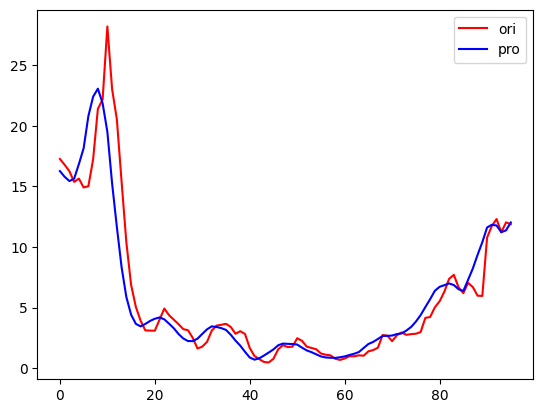

In [97]:
import numpy as np
import matplotlib.pyplot as plt
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

df_ = moving_average(df2['出力(MW)'], 5)

df2['出力(MW)'][:96].plot(color='r', label='ori')
plt.plot(df_[:96], color='b', label='pro')
plt.legend()

In [86]:
df2.groupby('站点编号').describe()

气压(Pa）                                                        \
        count           mean         std         min            25%   
站点编号                                                                  
f1    46368.0  101251.473011  749.975021  98992.7188  100580.808575   
f2    46368.0  101443.872999  694.323045  99314.2353  100837.769575   
f3    46368.0  101305.814161  617.393321  99594.8245  100766.298125   
f4    46368.0  100943.226607  634.528952  99128.3464  100389.818925   
f5    46368.0  101119.929163  754.427962  98800.7188  100443.493700   

                                                相对湿度（%）             ...  \
               50%            75%          max    count       mean  ...   
站点编号                                                                ...   
f1    101315.04210  101818.826575  103356.7335  46368.0  67.449370  ...   
f2    101490.06250  101962.615550  103436.3124  46368.0  65.929146  ...   
f3    101333.56710  101769.406850  103071.7386  46368.0  68.973317  ...   
f4    100979.24830  101421.454750  102783.4495  46368.0  67.567442  ...   
f5    101181.19735  101690.301350  103242.3308  46368.0  67.597914  ...   

       100m风向（°)             出力(MW)                                       \
             75%       max    count        mean         std   min    25%   
站点编号                                                                       
f1    169.072850  360.0000  46365.0   13.779889   12.379734 -0.48   2.61   
f2    161.118000  359.9821  46365.0  115.204893  101.619760 -2.85  18.58   
f3    149.032300  359.9936  46365.0   10.570675   11.812190 -0.50   0.83   
f4    184.865175  359.9481  46365.0   25.685877   24.315241 -0.57   4.07   
f5    142.335850  359.9938  46365.0   17.420514   13.818398 -0.33   3.23   

                             
        50%     75%     max  
站点编号                         
f1    10.40   23.44   44.43  
f2    88.76  211.04  296.58  
f3     6.24   17.07   47.43  
f4    18.39   42.06   84.82  
f5    16.56   30.93   45.59  

[5 rows x 88 columns]

In [7]:
for idx, raw in df.iterrows():
    raw

In [10]:
df['装机容量(MW)']

0     48
1    280
2     48
3     88
4     48
Name: 装机容量(MW), dtype: int64

In [98]:
df['装机容量(MW)'].shift(1) + df['装机容量(MW)']

0      NaN
1    328.0
2    328.0
3    136.0
4    136.0
Name: 装机容量(MW), dtype: float64

In [26]:
df2[['站点编号', '出力(MW)']].groupby(['站点编号']).min()

,出力(MW)
站点编号,
f1,-0.01
f2,-0.01
f3,-0.01
f4,-0.01
f5,-0.01


In [48]:
df_same = df2['出力(MW)'] == df2['出力(MW)'].shift(1)
df_same 

0         False
1         False
2         False
3         False
4         False
          ...  
231835    False
231836    False
231837    False
231838    False
231839    False
Name: 出力(MW), Length: 231840, dtype: bool

In [52]:
df_same[1] = 1

C:\Users\shuminhao\AppData\Local\Temp\ipykernel_22236\1988248072.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_same[1] = 1


In [71]:
df2[231590:231604]

,站点编号,时间,气压(Pa）,相对湿度（%）,云量,10米风速（10m/s）,10米风向（°),温度（K）,辐照强度（J/m2）,降水（m）,100m风速（100m/s）,100m风向（°),出力(MW)
231590,f5,2023-4-28 9:30,101082.1700,67.3289,0.066501,0.31604,94.3855,292.3636,625.0834,2.900000e-09,0.27353,45.5992,-0.22
231591,f5,2023-4-28 9:45,101076.0380,67.3772,0.045782,0.58149,113.2165,292.3326,668.6521,1.550000e-09,0.37113,91.0997,-0.22
231592,f5,2023-4-28 10:00,101067.8047,67.4037,0.023438,0.91068,121.4606,292.2966,709.1478,0.000000e+00,0.61970,112.6193,-0.22
231593,f5,2023-4-28 10:15,101057.0875,67.4083,0.010041,1.30750,126.4697,292.2786,746.0498,0.000000e+00,0.96024,123.0163,-0.22
231594,f5,2023-4-28 10:30,101043.7179,67.4280,0.017909,1.74200,129.7861,292.2682,779.2817,0.000000e+00,1.34730,128.6633,-0.22
231595,f5,2023-4-28 10:45,101027.5812,67.5092,0.059791,2.17340,132.1626,292.2469,808.8784,0.000000e+00,1.73580,132.0997,-0.22
231596,f5,2023-4-28 11:00,101008.5625,67.6981,0.148440,2.56180,134.0347,292.1960,834.8745,0.000000e+00,2.08390,134.4334,-0.22
231597,f5,2023-4-28 11:15,100986.7530,68.0252,0.287580,2.87330,135.6516,292.1039,857.2199,2.230000e-10,2.35980,136.2367,-0.22
231598,f5,2023-4-28 11:30,100963.0677,68.4577,0.444870,3.09790,137.1034,291.9868,875.5262,2.500000e-10,2.56600,137.9536,-0.22
231599,f5,2023-4-28 11:45,100938.6279,68.9470,0.578940,3.23120,138.4196,291.8678,889.3202,1.520000e-10,2.71480,139.8718,-0.22


In [69]:
df_same = df2['出力(MW)'] == df2['出力(MW)'].shift(1) 
for idx, value in enumerate(df_same.values):
    if value == False:
        df_same[idx] = 0
        continue
    if idx == 0:
        df_same[idx] = 1
    else:
        df_same[idx] = df_same[idx-1] + 1
    
df2['出力(MW)'][df_same > 10]
# df_ans

C:\Users\shuminhao\AppData\Local\Temp\ipykernel_22236\164498693.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_same[idx] = 0


13010         0
13011         0
13012         0
13013         0
13014         0
          ...  
231601    -0.22
231602    -0.22
231603    -0.22
231604    -0.22
231605    -0.22
Name: 出力(MW), Length: 4743, dtype: object